## [Eng de Dados] Trabalho Final - DataOps
#### Benício B. de A. Carneiro
10/05/2025


In [1]:
%pip install pandasql
%pip install seaborn

import pandas as pd 
from pandasql import sqldf
import numpy as np
import sqlite3
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


### Análise Exploratória da Tabela

In [2]:
conn_sqlite = sqlite3.connect('salarios-servidores.db')
df_ = pd.read_sql_query("""
    SELECT *
    FROM 'staging-abril'
""", conn_sqlite)


In [3]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  200 non-null    object 
 1   total_proventos     200 non-null    float64
 2   proventos_liquidos  200 non-null    float64
 3   total_descontos     200 non-null    float64
 4   desconto_teto       200 non-null    float64
 5   outros_descontos    200 non-null    float64
 6   criacao             200 non-null    object 
 7   atualizacao         200 non-null    object 
 8   competencia         200 non-null    object 
 9   situacao_funcional  200 non-null    object 
 10  dsc_cargo           200 non-null    object 
 11  codigo_orgao        200 non-null    object 
 12  descricao_orgao     200 non-null    object 
 13  sigla               200 non-null    object 
dtypes: float64(5), object(9)
memory usage: 22.0+ KB


In [4]:
df_.describe()

,total_proventos,proventos_liquidos,total_descontos,desconto_teto,outros_descontos
count,200.000000,200.000000,200.000000,200.0,200.000000
mean,4134.426250,2975.589100,1158.837150,0.0,1158.837150
std,3269.077417,2292.608159,1292.102635,0.0,1292.102635
min,1412.000000,709.500000,0.000000,0.0,0.000000
25%,3168.000000,1790.877500,377.230000,0.0,377.230000
50%,3168.000000,2545.845000,889.490000,0.0,889.490000
75%,3168.000000,2826.070000,1468.135000,0.0,1468.135000
max,21341.790000,17838.980000,8992.220000,0.0,8992.220000


In [5]:
df_.isnull().sum()

id                    0
total_proventos       0
proventos_liquidos    0
total_descontos       0
desconto_teto         0
outros_descontos      0
criacao               0
atualizacao           0
competencia           0
situacao_funcional    0
dsc_cargo             0
codigo_orgao          0
descricao_orgao       0
sigla                 0
dtype: int64

In [6]:
situacao_total_proventos = sqldf('''
    SELECT situacao_funcional, 
        max(total_proventos) as max_total, 
        max(proventos_liquidos) as max_liquidos, 
        min(total_proventos) as min_total, 
        min(proventos_liquidos) as min_liquidos
    FROM df_ 
    GROUP BY situacao_funcional
    ''')
situacao_total_proventos.set_index('situacao_funcional', inplace=True)

In [7]:
cargo_total_proventos = sqldf('''
    SELECT dsc_cargo, 
        max(total_proventos) as max_total, 
        max(proventos_liquidos) as max_liquidos, 
        min(total_proventos) as min_total, 
        min(proventos_liquidos) as min_liquidos
    FROM df_ 
    GROUP BY dsc_cargo
    ''')
cargo_total_proventos.set_index('dsc_cargo', inplace=True)

In [8]:
sigla_total_proventos = sqldf('''
    SELECT sigla, 
        max(total_proventos) as max_total, 
        max(proventos_liquidos) as max_liquidos, 
        min(total_proventos) as min_total, 
        min(proventos_liquidos) as min_liquidos
    FROM df_ 
    GROUP BY sigla
    ''')
sigla_total_proventos.set_index('sigla', inplace=True)

In [9]:
sigla_situacao = sqldf('''
    SELECT sigla, situacao_funcional,
    count(id)
    FROM df_ 
    GROUP BY 1,2
    ORDER BY 3 DESC
    ''')

In [10]:
sigla_cargo = sqldf('''
    SELECT sigla, dsc_cargo,
    count(id)
    FROM df_ 
    GROUP BY 1,2
    ORDER BY 3 DESC
    ''')

In [11]:
cargo_situacao = sqldf('''
    SELECT dsc_cargo, situacao_funcional,
    count(id)
    FROM df_ 
    GROUP BY 1,2
    ORDER BY 3 DESC
    ''')

### Top 5 Maiores Ocorrências (%)

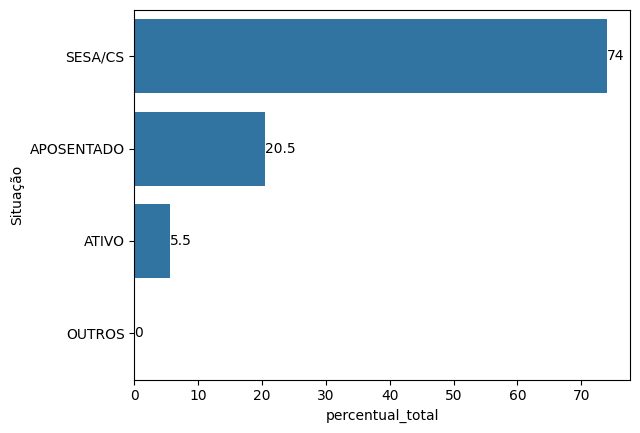

In [12]:
situacao_top = df_['situacao_funcional'].value_counts().head().to_frame()
situacao_outros = pd.DataFrame({'count': len(df_)-situacao_top['count'].sum()}, index= ['OUTROS'])
situacao_top = pd.concat([situacao_top,situacao_outros])
situacao_top['percentual_total'] = round(situacao_top['count']*100/len(df_),2)

situacao_plot = sns.barplot(data=situacao_top, x='percentual_total', y=situacao_top.index, orient='h')
situacao_plot.bar_label(situacao_plot.containers[0], fontsize=10)
situacao_plot.set_ylabel('Situação');

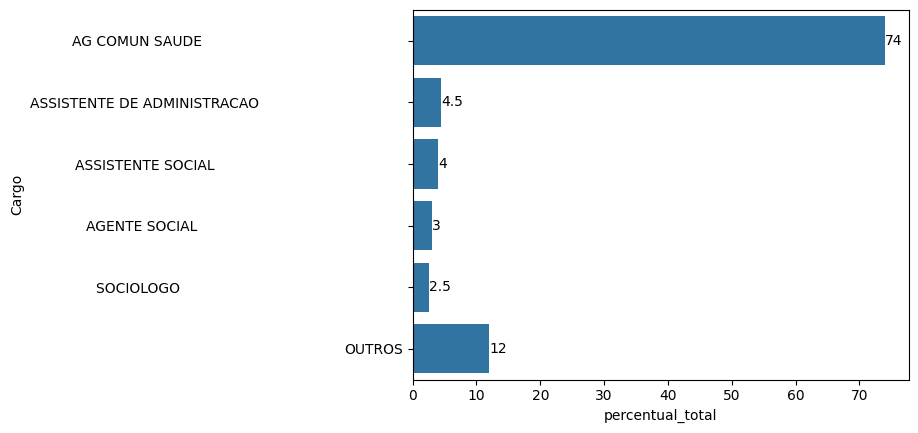

In [13]:
cargo_top = df_['dsc_cargo'].value_counts().head().to_frame()
cargo_outros = pd.DataFrame({'count': len(df_)-cargo_top['count'].sum()}, index= ['OUTROS'])
cargo_top = pd.concat([cargo_top,cargo_outros])
cargo_top['percentual_total'] = round(cargo_top['count']*100/len(df_),2)

cargo_plot = sns.barplot(data=cargo_top, x='percentual_total', y=cargo_top.index, orient='h')
cargo_plot.bar_label(cargo_plot.containers[0], fontsize=10)
cargo_plot.set_ylabel('Cargo');

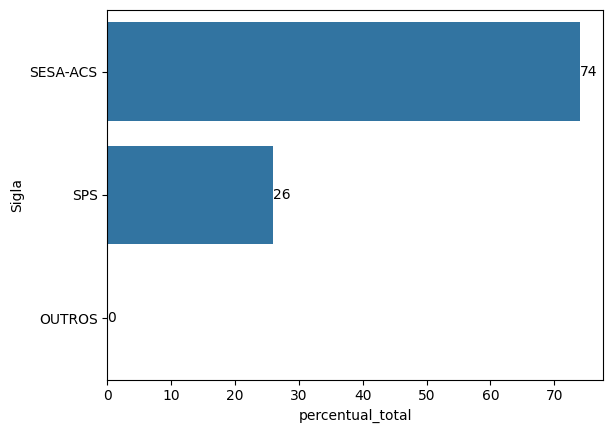

In [14]:
sigla_top = df_['sigla'].value_counts().head().to_frame()
sigla_outros = pd.DataFrame({'count': len(df_)-sigla_top['count'].sum()}, index= ['OUTROS'])
sigla_top = pd.concat([sigla_top,sigla_outros])
sigla_top['percentual_total'] = round(sigla_top['count']*100/len(df_),2)

sigla_plot = sns.barplot(data=sigla_top, x='percentual_total', y=sigla_top.index, orient='h')
sigla_plot.bar_label(sigla_plot.containers[0], fontsize=10)
sigla_plot.set_ylabel('Sigla');

### Top 5 Maiores e Menores

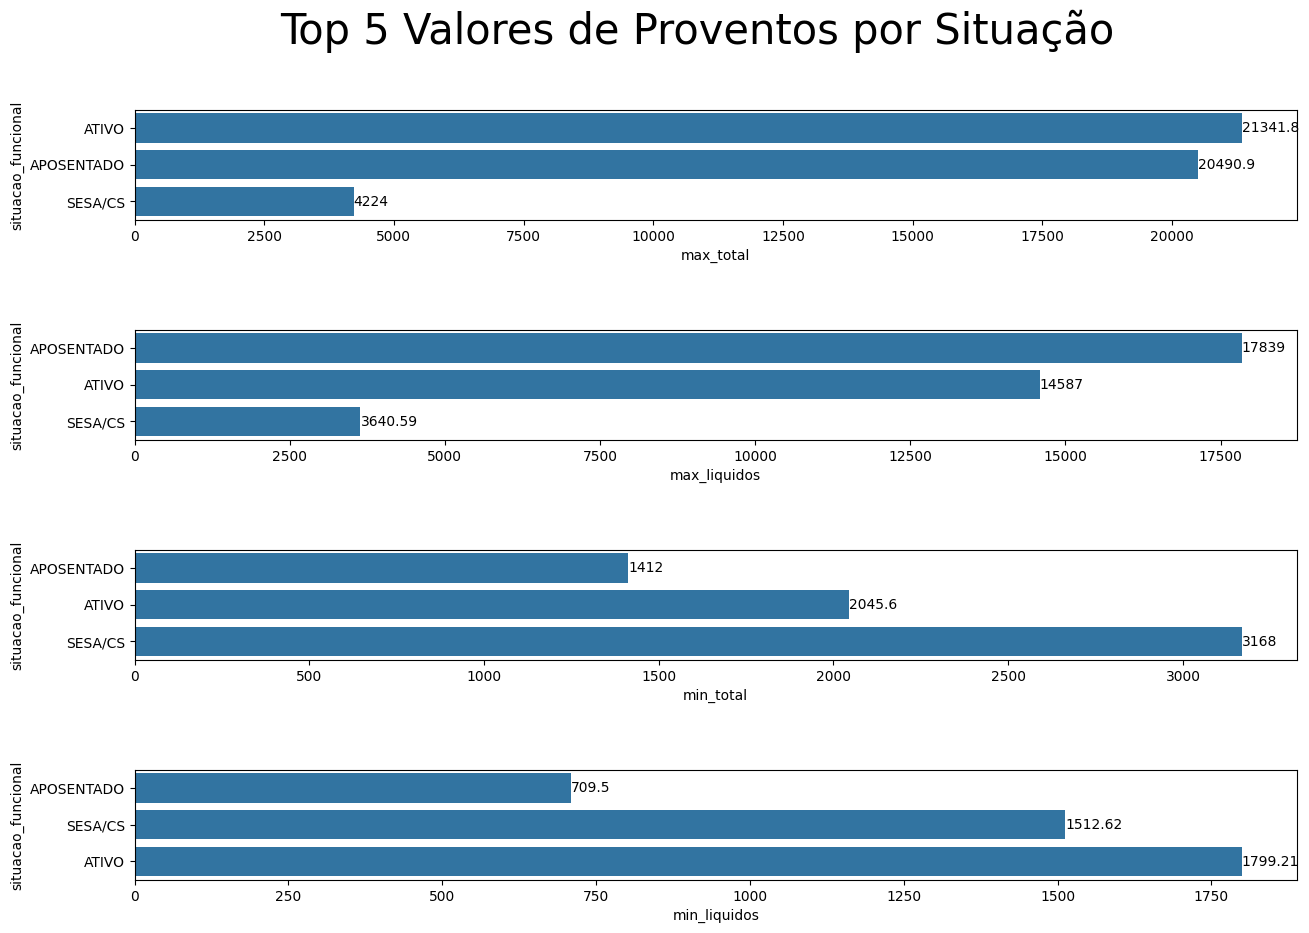

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(15, 10))

fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=1, hspace=1)

data1 = situacao_total_proventos['max_total'].sort_values(ascending=False).head().to_frame()
data2 = situacao_total_proventos['max_liquidos'].sort_values(ascending=False).head().to_frame()
data3 = situacao_total_proventos['min_total'].sort_values(ascending=True).head().to_frame()
data4 = situacao_total_proventos['min_liquidos'].sort_values(ascending=True).head().to_frame()

plot1 = sns.barplot(ax=axes[0], data=data1, x='max_total', y='situacao_funcional', orient='h')
plot1.bar_label(plot1.containers[0], fontsize=10);
plot2 = sns.barplot(ax=axes[1], data=data2, x='max_liquidos', y='situacao_funcional', orient='h')
plot2.bar_label(plot2.containers[0], fontsize=10);
plot3 = sns.barplot(ax=axes[2], data=data3, x='min_total', y='situacao_funcional', orient='h')
plot3.bar_label(plot3.containers[0], fontsize=10);
plot4 = sns.barplot(ax=axes[3], data=data4, x='min_liquidos', y='situacao_funcional', orient='h')
plot4.bar_label(plot4.containers[0], fontsize=10);



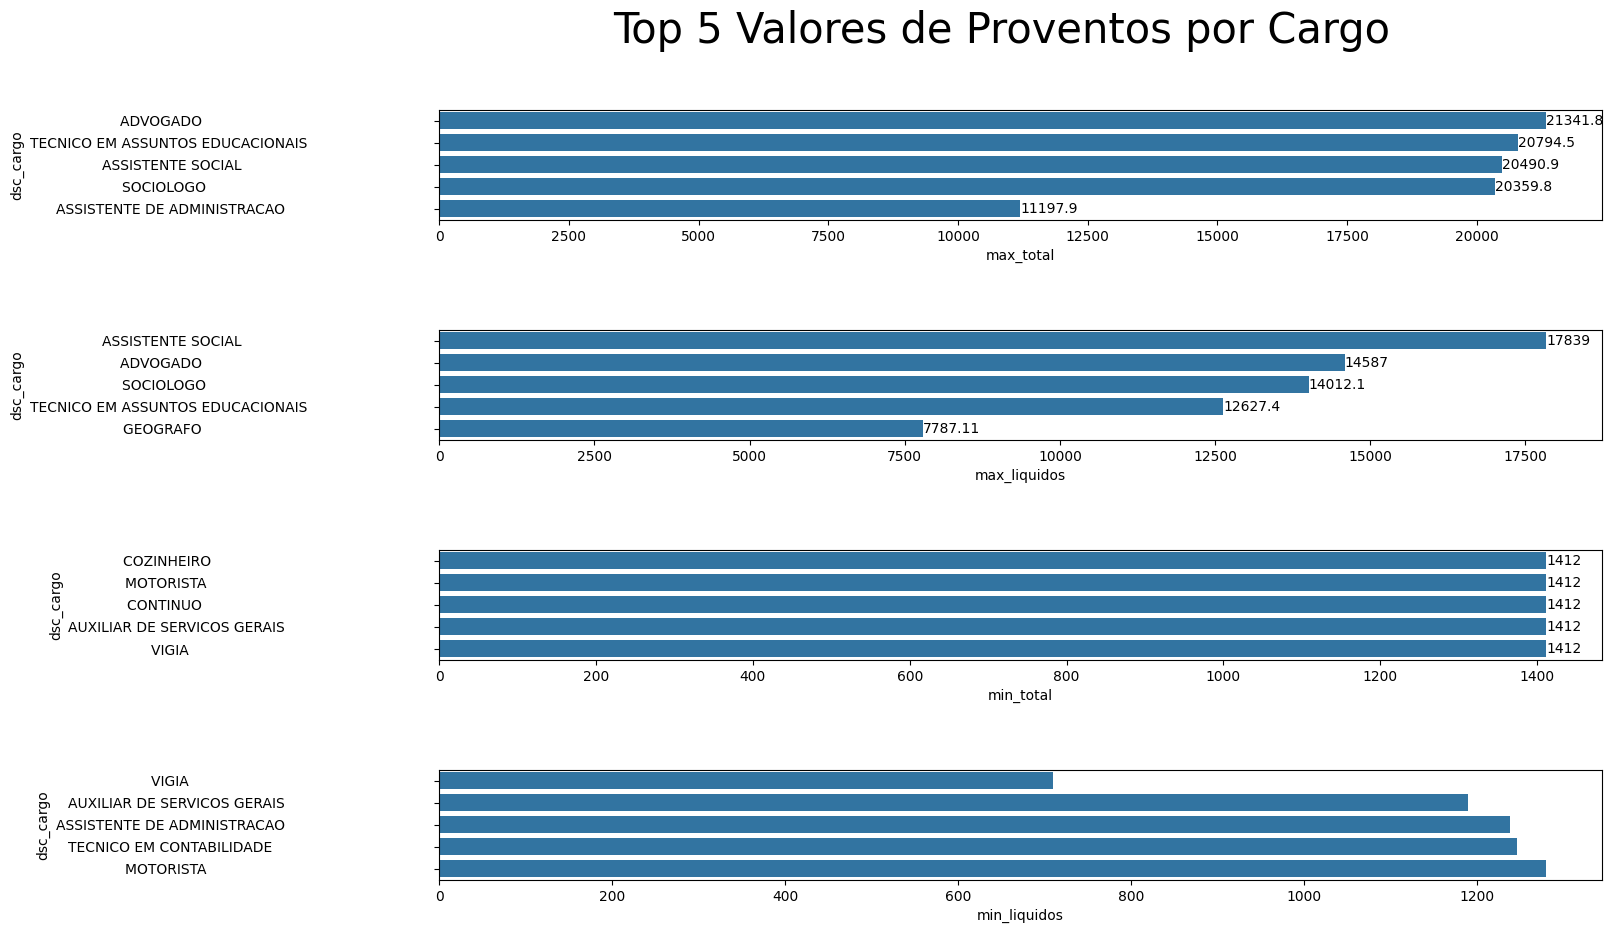

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

fig.suptitle('Top 5 Valores de Proventos por Cargo', size=30.0, ha='center')
fig.subplots_adjust(wspace=1, hspace=1)

data1 = cargo_total_proventos['max_total'].sort_values(ascending=False).head().to_frame()
data2 = cargo_total_proventos['max_liquidos'].sort_values(ascending=False).head().to_frame()
data3 = cargo_total_proventos['min_total'].sort_values(ascending=True).head().to_frame()
data4 = cargo_total_proventos['min_liquidos'].sort_values(ascending=True).head().to_frame()

plot1 = sns.barplot(ax=axes[0], data=data1, x='max_total', y='dsc_cargo', orient='h')
plot1.bar_label(plot1.containers[0], fontsize=10);
plot2 = sns.barplot(ax=axes[1], data=data2, x='max_liquidos', y='dsc_cargo', orient='h')
plot2.bar_label(plot2.containers[0], fontsize=10);
plot3 = sns.barplot(ax=axes[2], data=data3, x='min_total', y='dsc_cargo', orient='h')
plot3.bar_label(plot3.containers[0], fontsize=10);
plot4 = sns.barplot(ax=axes[3], data=data4, x='min_liquidos', y='dsc_cargo', orient='h')

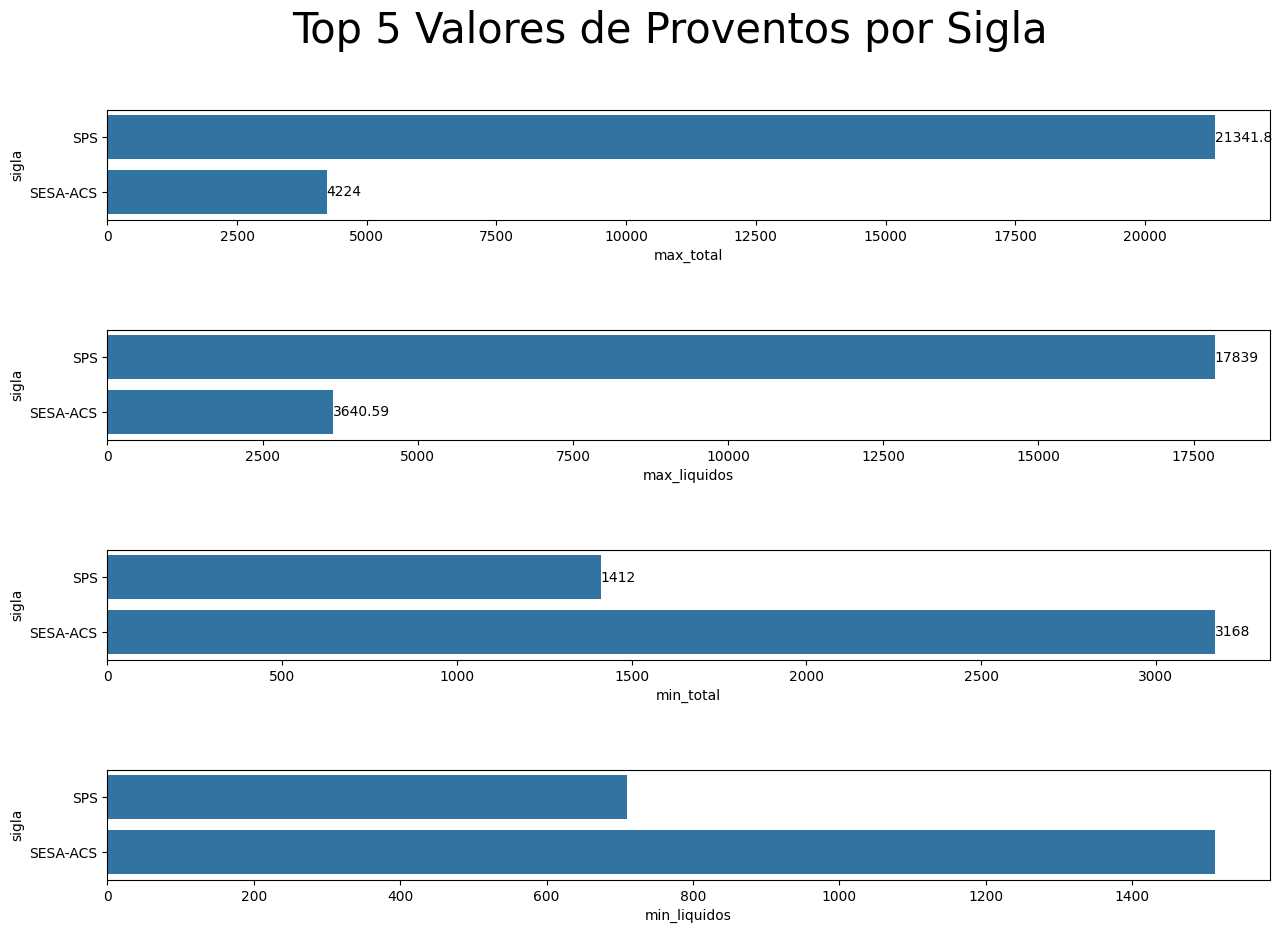

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

fig.suptitle('Top 5 Valores de Proventos por Sigla', size=30.0, ha='center')
fig.subplots_adjust(wspace=1, hspace=1)

data1 = sigla_total_proventos['max_total'].sort_values(ascending=False).head().to_frame()
data2 = sigla_total_proventos['max_liquidos'].sort_values(ascending=False).head().to_frame()
data3 = sigla_total_proventos['min_total'].sort_values(ascending=True).head().to_frame()
data4 = sigla_total_proventos['min_liquidos'].sort_values(ascending=True).head().to_frame()

plot1 = sns.barplot(ax=axes[0], data=data1, x='max_total', y='sigla', orient='h')
plot1.bar_label(plot1.containers[0], fontsize=10);
plot2 = sns.barplot(ax=axes[1], data=data2, x='max_liquidos', y='sigla', orient='h')
plot2.bar_label(plot2.containers[0], fontsize=10);
plot3 = sns.barplot(ax=axes[2], data=data3, x='min_total', y='sigla', orient='h')
plot3.bar_label(plot3.containers[0], fontsize=10);
plot4 = sns.barplot(ax=axes[3], data=data4, x='min_liquidos', y='sigla', orient='h')

In [18]:
situacao_total_top = df_.groupby(["situacao_funcional"])["total_proventos"].median().sort_values(ascending=False).dropna()
situacao_std_total_top = df_.groupby(["situacao_funcional"])["total_proventos"].std().sort_values(ascending=False).dropna()
situacao_liq_top = df_.groupby(["situacao_funcional"])["proventos_liquidos"].median().sort_values(ascending=False).dropna()
situacao_std_liq_top = df_.groupby(["situacao_funcional"])["proventos_liquidos"].std().sort_values(ascending=False).dropna()

In [19]:
cargo_total_top = df_.groupby(["dsc_cargo"])["total_proventos"].median().sort_values(ascending=False).dropna()
cargo_std_total_top = df_.groupby(["dsc_cargo"])["total_proventos"].std().sort_values(ascending=False).dropna()
cargo_liq_top = df_.groupby(["dsc_cargo"])["proventos_liquidos"].median().sort_values(ascending=False).dropna()
cargo_std_liq_top = df_.groupby(["dsc_cargo"])["proventos_liquidos"].std().sort_values(ascending=False).dropna()


In [20]:
sigla_total_top = df_.groupby(["sigla"])["total_proventos"].median().sort_values(ascending=False).dropna()
sigla_std_total_top = df_.groupby(["sigla"])["total_proventos"].std().sort_values(ascending=False).dropna()
sigla_liq_top = df_.groupby(["sigla"])["proventos_liquidos"].median().sort_values(ascending=False).dropna()
sigla_std_liq_top = df_.groupby(["sigla"])["proventos_liquidos"].std().sort_values(ascending=False).dropna()


### Top 5 Maiores e Menores Medianas/Desvios

In [21]:
print('-------------------------------------------SITUAÇÃO-------------------------------------------')
print('-> Top 5 Maiores Proventos Totais')
print(' - Mediana')
print(situacao_total_top.head())
print()
print(' - Desvio-padrão')
print(situacao_std_total_top.head())
print()
print('-> Top 5 Maiores Proventos Líquidos')
print(' - Mediana')
print(situacao_liq_top.head())
print()
print(' - Desvio-padrão')
print(situacao_std_liq_top.head())
print()
print('-> Top 5 Menores Proventos Totais')
print(' - Mediana')
print(situacao_total_top.tail())
print()
print(' - Desvio-padrão')
print(situacao_std_total_top.tail())
print()
print('-> Top 5 Menores Proventos Líquidos')
print(' - Mediana')
print(situacao_liq_top.tail())
print()
print(' - Desvio-padrão')
print(situacao_std_liq_top.tail())


-------------------------------------------SITUAÇÃO-------------------------------------------
-> Top 5 Maiores Proventos Totais
 - Mediana
situacao_funcional
ATIVO         8322.36
APOSENTADO    4233.99
SESA/CS       3168.00
Name: total_proventos, dtype: float64

 - Desvio-padrão
situacao_funcional
ATIVO         6911.491436
APOSENTADO    4755.596342
SESA/CS        191.437676
Name: total_proventos, dtype: float64

-> Top 5 Maiores Proventos Líquidos
 - Mediana
situacao_funcional
ATIVO         5627.17
APOSENTADO    2896.23
SESA/CS       2427.16
Name: proventos_liquidos, dtype: float64

 - Desvio-padrão
situacao_funcional
ATIVO         4729.163274
APOSENTADO    3536.464645
SESA/CS        502.422050
Name: proventos_liquidos, dtype: float64

-> Top 5 Menores Proventos Totais
 - Mediana
situacao_funcional
ATIVO         8322.36
APOSENTADO    4233.99
SESA/CS       3168.00
Name: total_proventos, dtype: float64

 - Desvio-padrão
situacao_funcional
ATIVO         6911.491436
APOSENTADO    4755.596

In [22]:
print('-------------------------------------------CARGO-------------------------------------------')
print('-> Top 5 Maiores Proventos Totais')
print(' - Mediana')
print(cargo_total_top.head())
print()
print(' - Desvio-padrão')
print(cargo_std_total_top.head())
print()
print('-> Top 5 Maiores Proventos Líquidos')
print(' - Mediana')
print(cargo_liq_top.head())
print()
print(' - Desvio-padrão')
print(cargo_std_liq_top.head())
print()
print('-> Top 5 Menores Proventos Totais')
print(' - Mediana')
print(cargo_total_top.tail())
print()
print(' - Desvio-padrão')
print(cargo_std_total_top.tail())
print()
print('-> Top 5 Menores Proventos Líquidos')
print(' - Mediana')
print(cargo_liq_top.tail())
print()
print(' - Desvio-padrão')
print(cargo_std_liq_top.tail())
print()

-------------------------------------------CARGO-------------------------------------------
-> Top 5 Maiores Proventos Totais
 - Mediana
dsc_cargo
ASSISTENTE SOCIAL                                               12967.26
TECNICO EM ASSUNTOS EDUCACIONAIS                                11221.78
SOCIOLOGO                                                        8950.11
GEOGRAFO                                                         8894.58
ADVOGADO                                                         8693.42
Name: total_proventos, dtype: float64

 - Desvio-padrão
dsc_cargo
ADVOGADO                                                        9505.970013
TECNICO EM ASSUNTOS EDUCACIONAIS                                8536.908627
SOCIOLOGO                                                       5218.208318
ASSISTENTE SOCIAL                                               5181.946882
ASSISTENTE DE ADMINISTRACAO                                     3215.615605
Name: total_proventos, dtype: float64

-> 

In [23]:
print('-------------------------------------------SIGLA-------------------------------------------')
print('-> Top 5 Maiores Proventos Totais')
print(' - Mediana')
print(sigla_total_top.head())
print()
print(' - Desvio-padrão')
print(sigla_std_total_top.head())
print()
print('-> Top 5 Maiores Proventos Líquidos')
print(' - Mediana')
print(sigla_liq_top.head())
print()
print(' - Desvio-padrão')
print(sigla_std_liq_top.head())
print()
print('-> Top 5 Menores Proventos Totais')
print(' - Mediana')
print(sigla_total_top.tail())
print()
print(' - Desvio-padrão')
print(sigla_std_total_top.tail())
print()
print('-> Top 5 Menores Proventos Líquidos')
print(' - Mediana')
print(sigla_liq_top.tail())
print()
print(' - Desvio-padrão')
print(sigla_liq_top.tail())
print()

-------------------------------------------SIGLA-------------------------------------------
-> Top 5 Maiores Proventos Totais
 - Mediana
sigla
SPS         4718.4
SESA-ACS    3168.0
Name: total_proventos, dtype: float64

 - Desvio-padrão
sigla
SPS         5650.223932
SESA-ACS     191.437676
Name: total_proventos, dtype: float64

-> Top 5 Maiores Proventos Líquidos
 - Mediana
sigla
SPS         3523.10
SESA-ACS    2427.16
Name: proventos_liquidos, dtype: float64

 - Desvio-padrão
sigla
SPS         3922.041713
SESA-ACS     502.422050
Name: proventos_liquidos, dtype: float64

-> Top 5 Menores Proventos Totais
 - Mediana
sigla
SPS         4718.4
SESA-ACS    3168.0
Name: total_proventos, dtype: float64

 - Desvio-padrão
sigla
SPS         5650.223932
SESA-ACS     191.437676
Name: total_proventos, dtype: float64

-> Top 5 Menores Proventos Líquidos
 - Mediana
sigla
SPS         3523.10
SESA-ACS    2427.16
Name: proventos_liquidos, dtype: float64

 - Desvio-padrão
sigla
SPS         3523.10
SESA-A

### Curvas de Desvio e Mediana

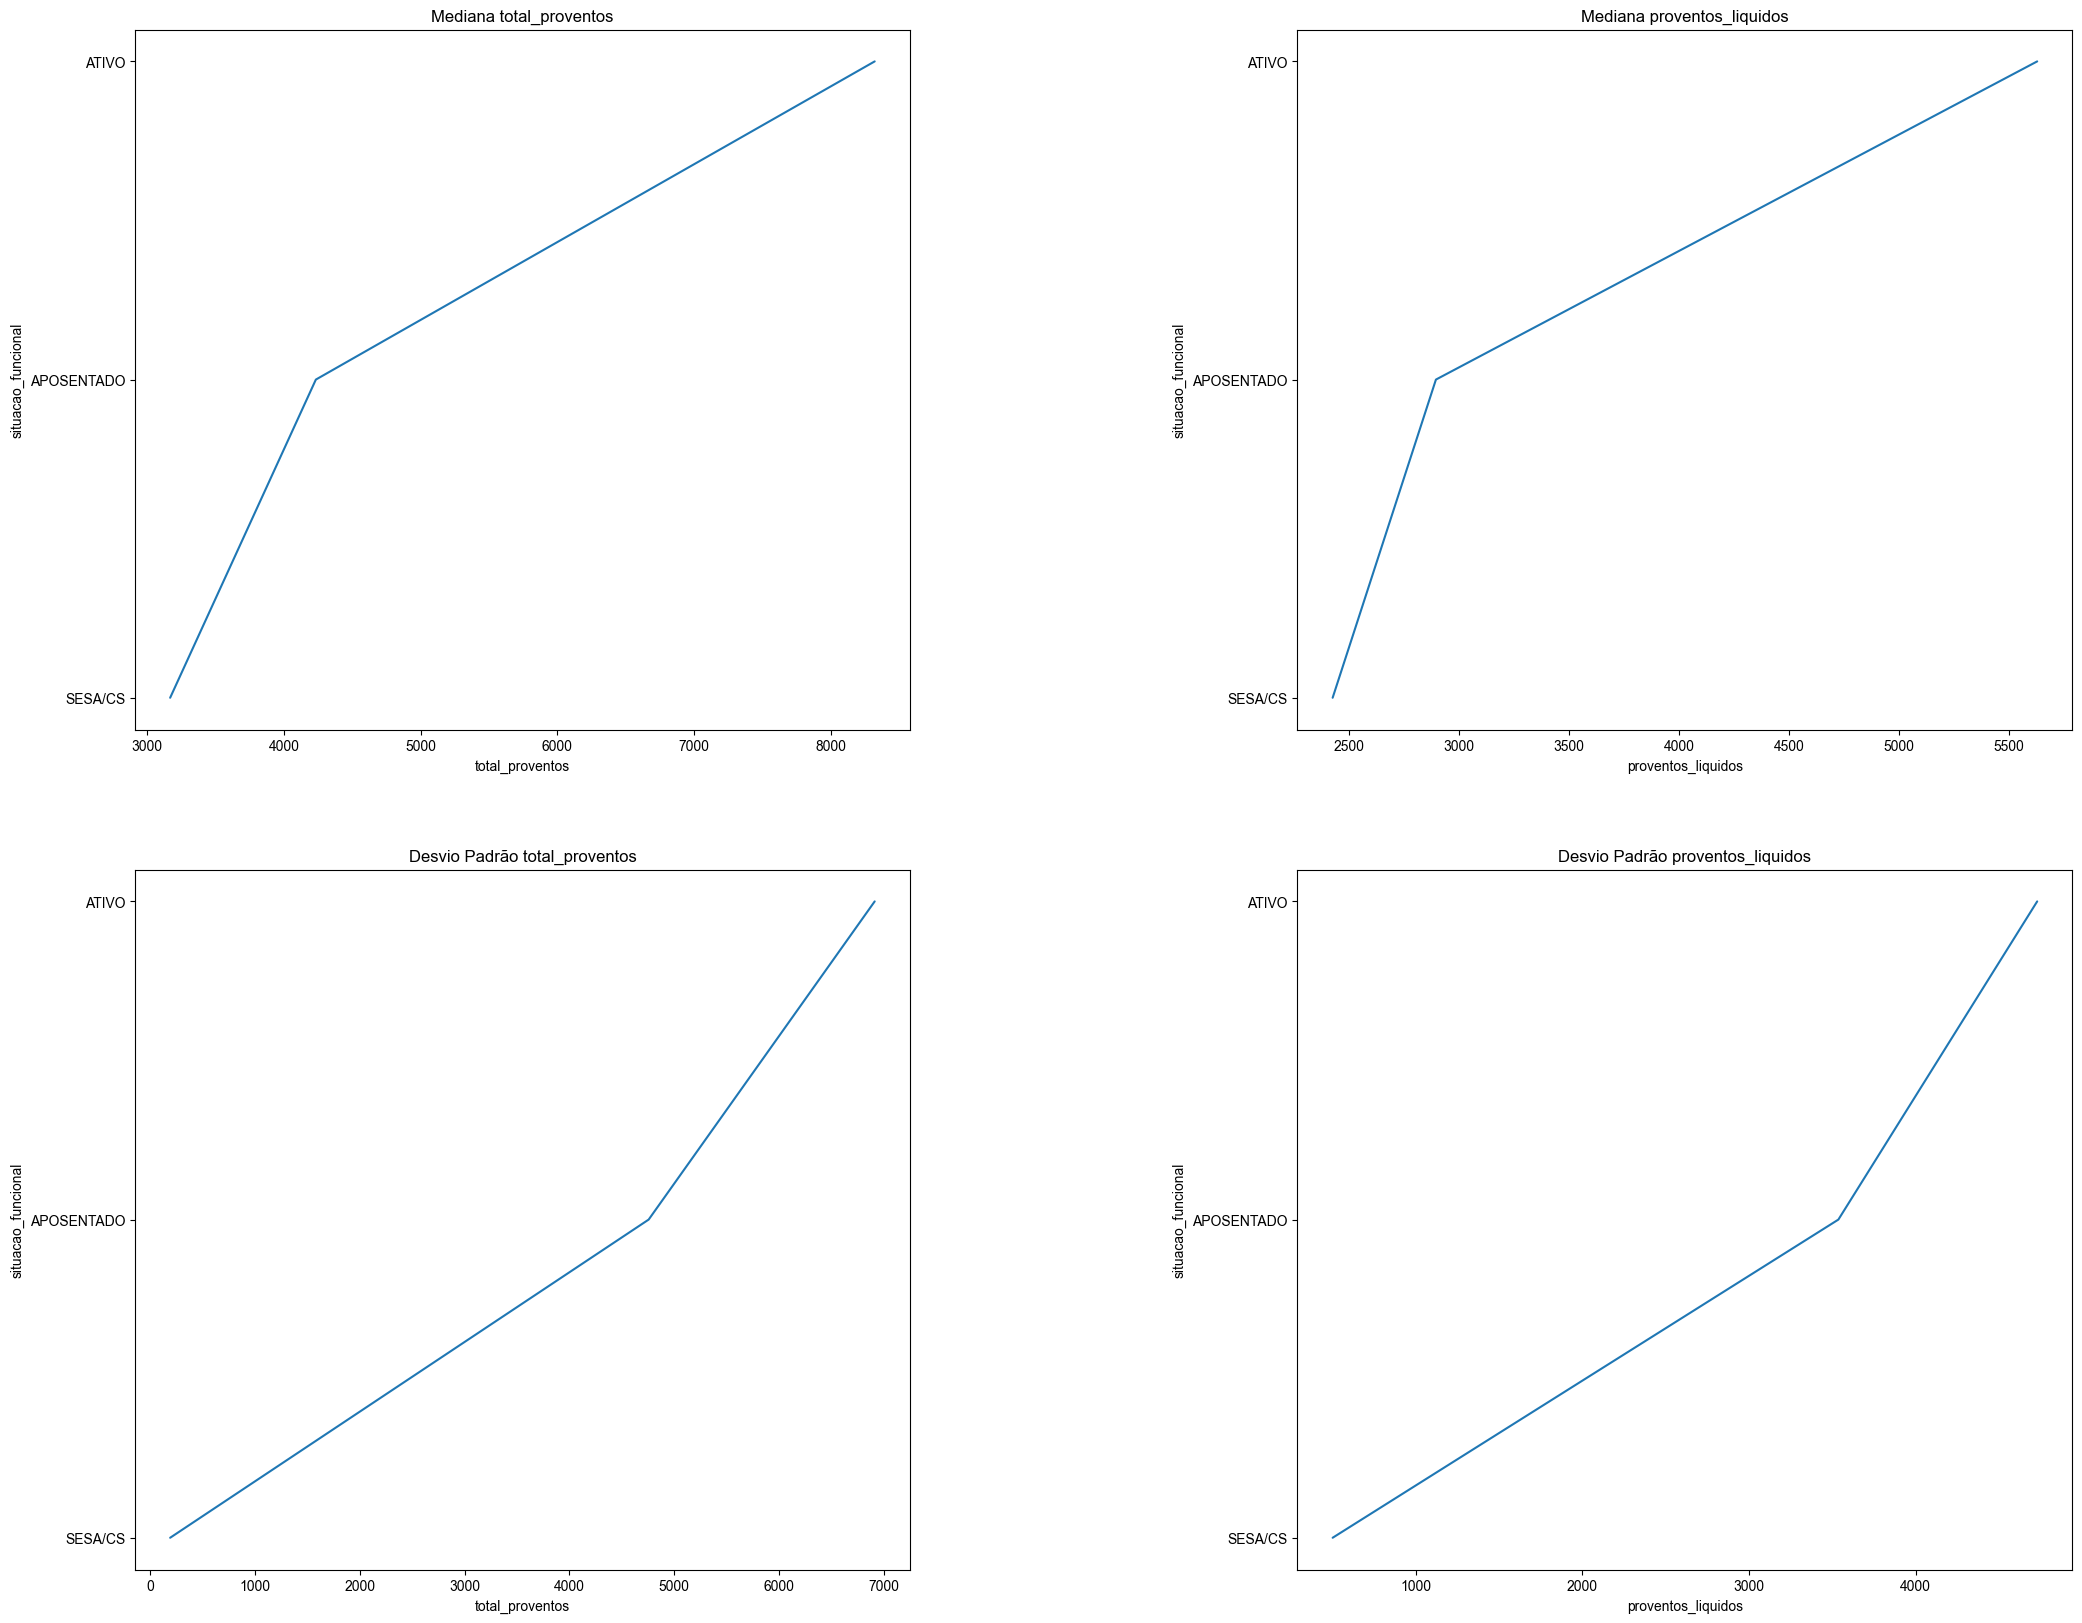

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

#fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=0.5)

data1 = situacao_total_top.to_frame()
data2 = situacao_liq_top.to_frame()
data3 = situacao_std_total_top.to_frame()
data4 = situacao_std_liq_top.to_frame()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plot1 = sns.lineplot(ax=axes[0,0], data=data1, x='total_proventos', y='situacao_funcional')
plot1.set(title='Mediana total_proventos', );
plot2 = sns.lineplot(ax=axes[0,1], data=data2, x='proventos_liquidos', y='situacao_funcional')
plot2.set(title='Mediana proventos_liquidos');
plot3 = sns.lineplot(ax=axes[1,0], data=data3, x='total_proventos', y='situacao_funcional')
plot3.set(title='Desvio Padrão total_proventos');
plot4 = sns.lineplot(ax=axes[1,1], data=data4, x='proventos_liquidos', y='situacao_funcional')
plot4.set(title='Desvio Padrão proventos_liquidos');


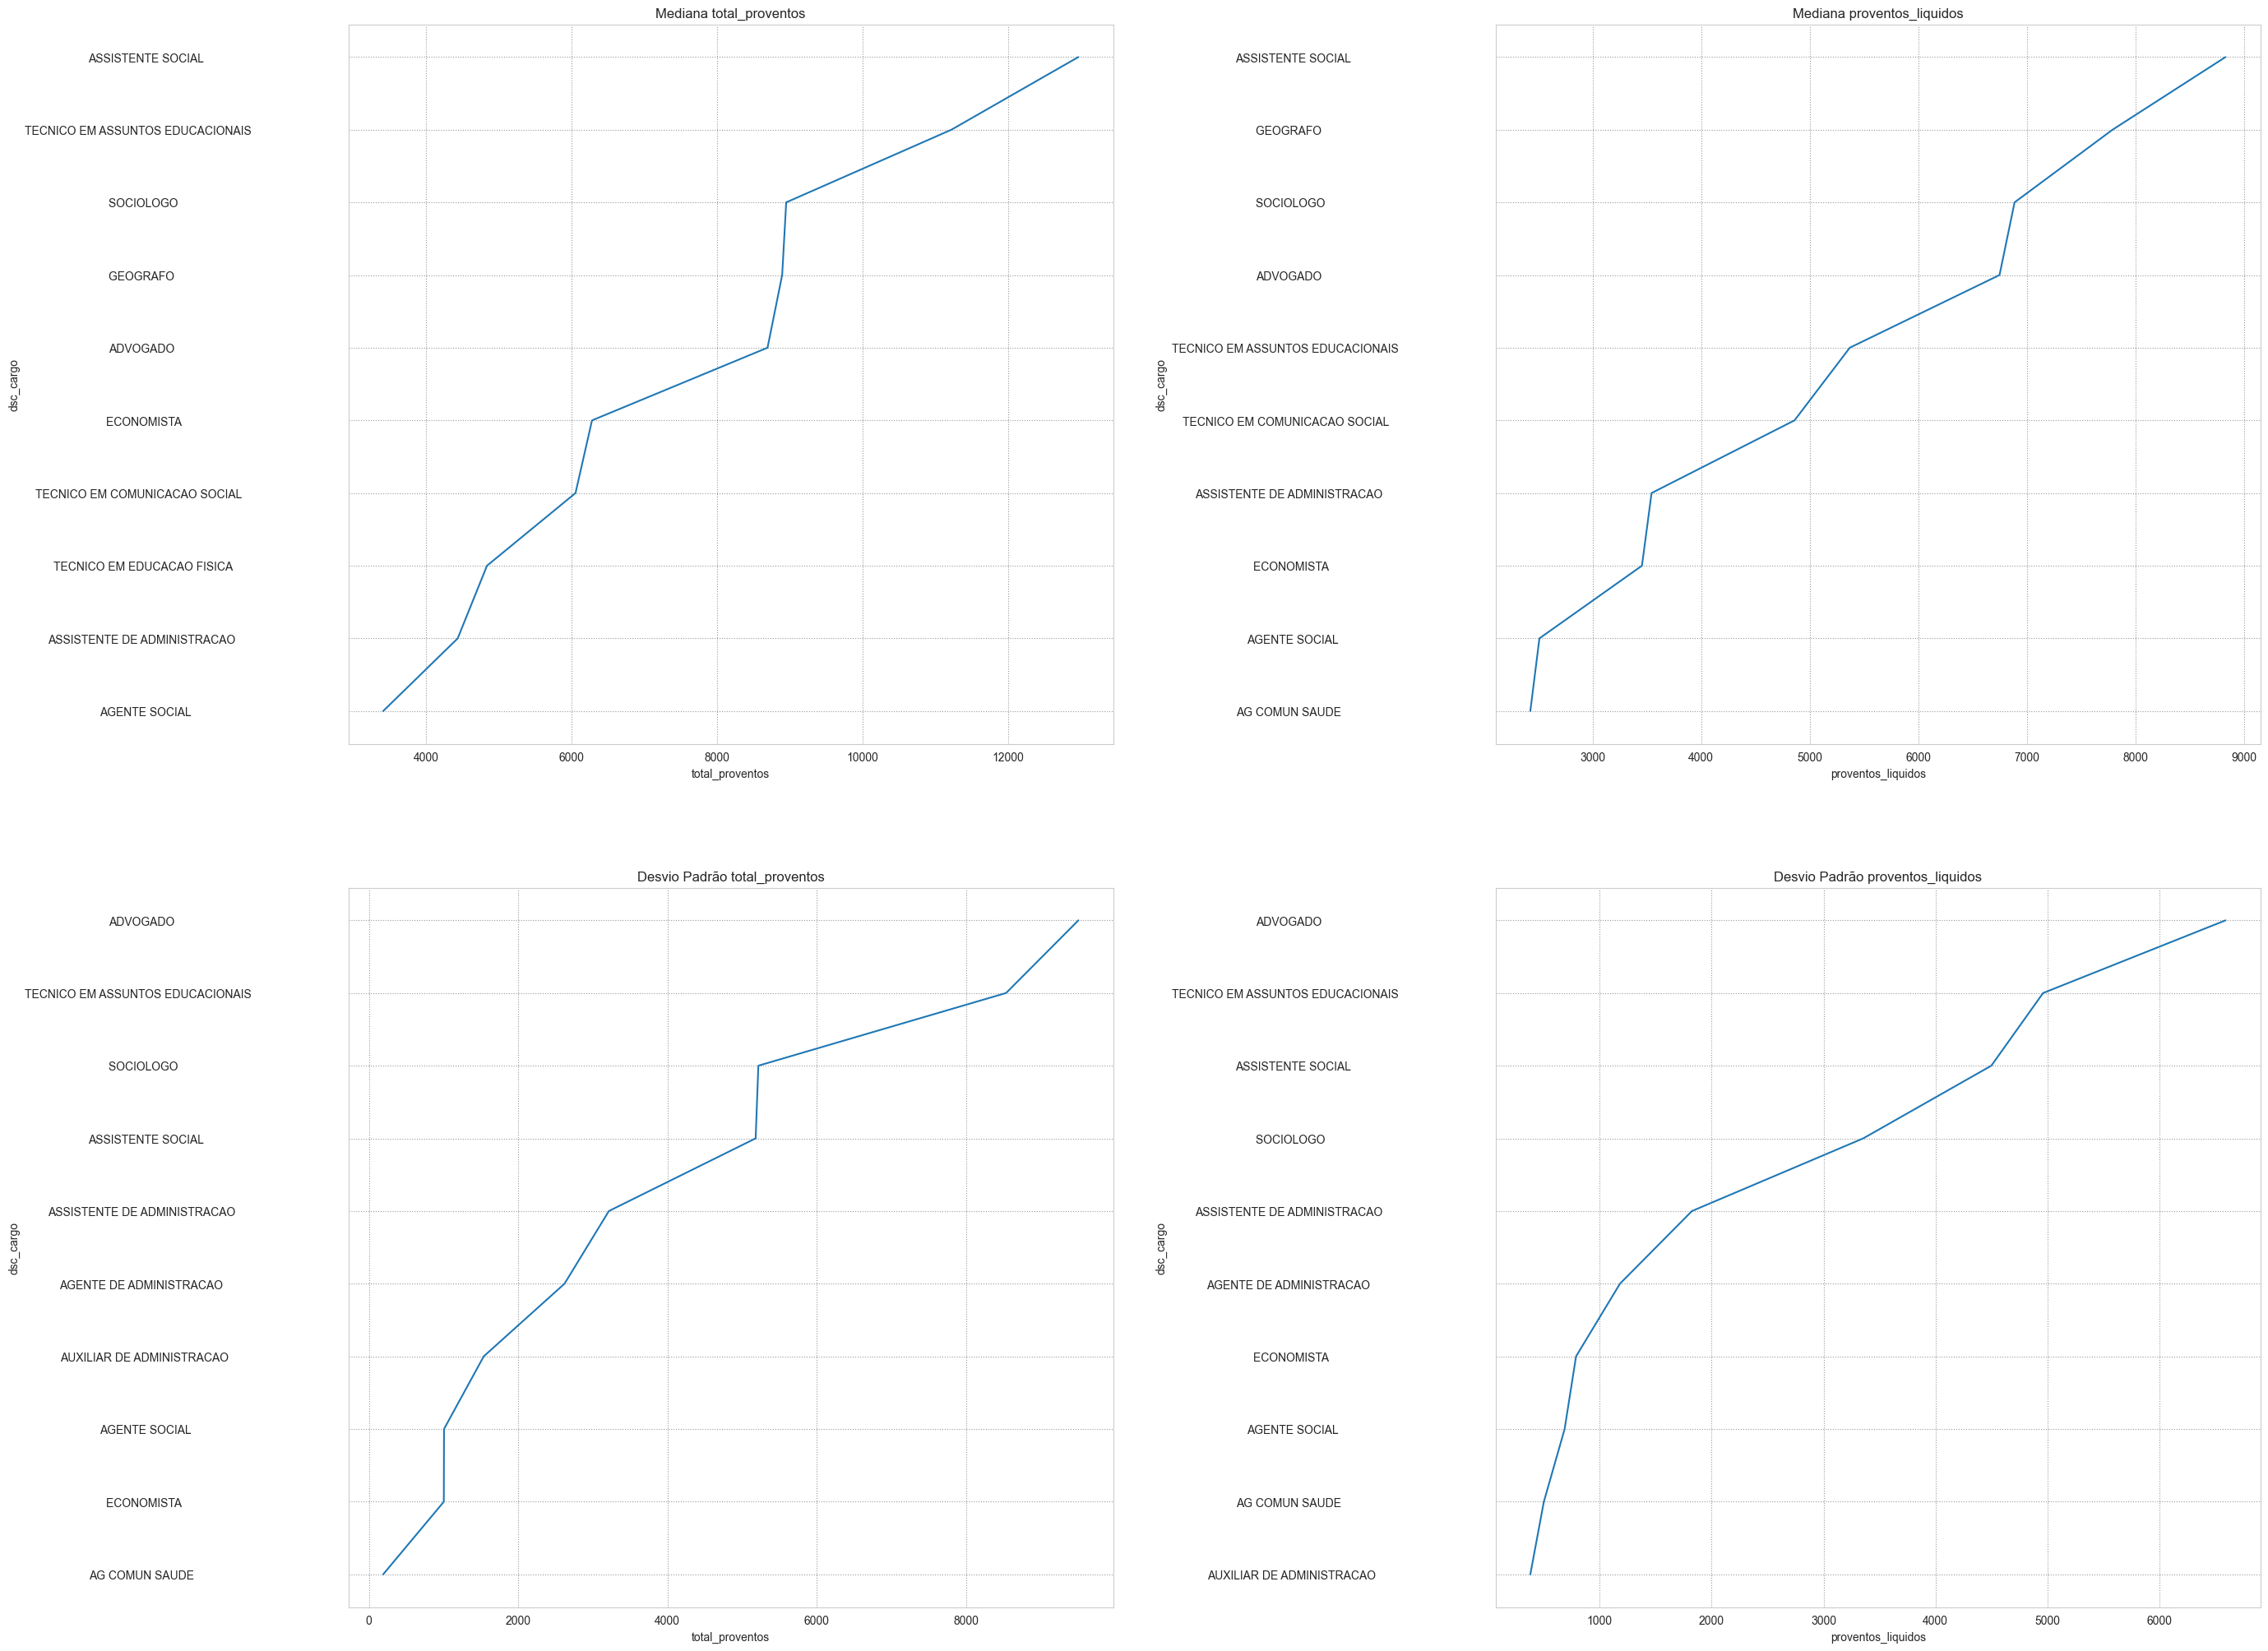

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(30,25))

#fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=0.5)

data1 = cargo_total_top.head(10).to_frame()
data2 = cargo_liq_top.head(10).to_frame()
data3 = cargo_std_total_top.head(10).to_frame()
data4 = cargo_std_liq_top.head(10).to_frame()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plot1 = sns.lineplot(ax=axes[0,0], data=data1, x='total_proventos', y='dsc_cargo')
plot1.set(title='Mediana total_proventos', );
plot2 = sns.lineplot(ax=axes[0,1], data=data2, x='proventos_liquidos', y='dsc_cargo')
plot2.set(title='Mediana proventos_liquidos');
plot3 = sns.lineplot(ax=axes[1,0], data=data3, x='total_proventos', y='dsc_cargo')
plot3.set(title='Desvio Padrão total_proventos');
plot4 = sns.lineplot(ax=axes[1,1], data=data4, x='proventos_liquidos', y='dsc_cargo')
plot4.set(title='Desvio Padrão proventos_liquidos');


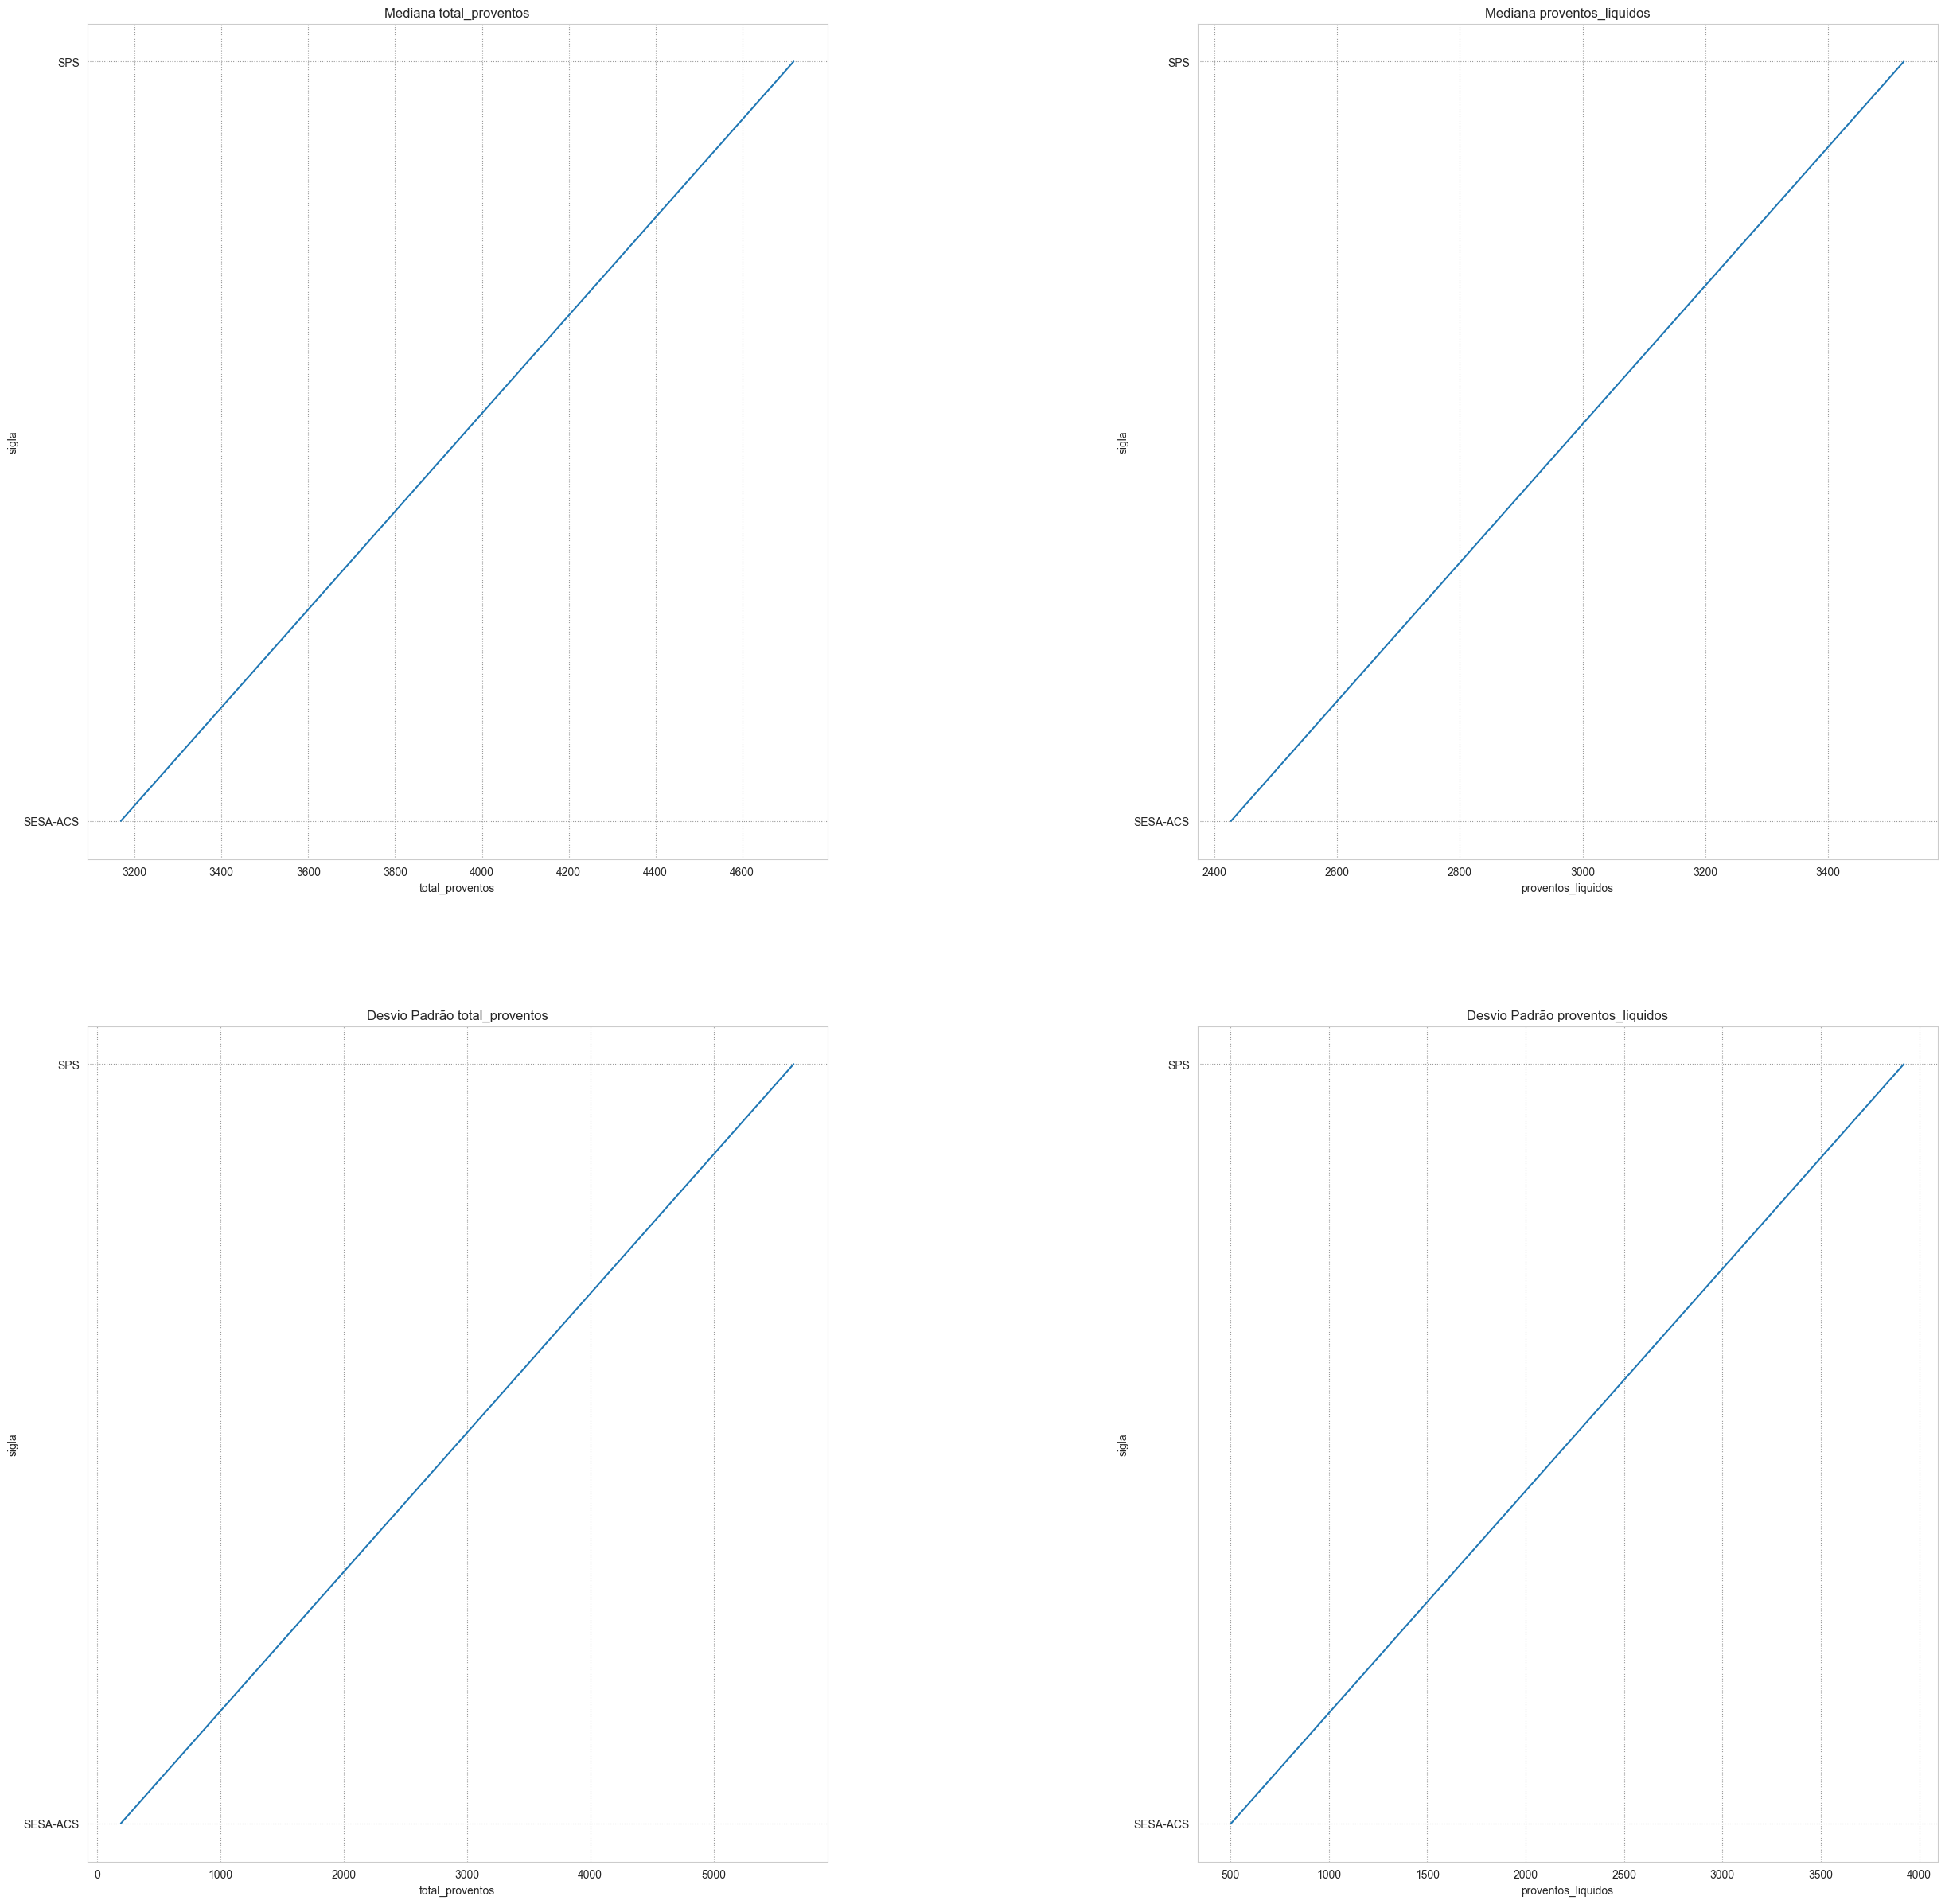

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(30, 30))

#fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=0.5)

data1 = sigla_total_top.to_frame()
data2 = sigla_liq_top.to_frame()
data3 = sigla_std_total_top.to_frame()
data4 = sigla_std_liq_top.to_frame()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plot1 = sns.lineplot(ax=axes[0,0], data=data1, x='total_proventos', y='sigla')
plot1.set(title='Mediana total_proventos', );
plot2 = sns.lineplot(ax=axes[0,1], data=data2, x='proventos_liquidos', y='sigla')
plot2.set(title='Mediana proventos_liquidos');
plot3 = sns.lineplot(ax=axes[1,0], data=data3, x='total_proventos', y='sigla')
plot3.set(title='Desvio Padrão total_proventos');
plot4 = sns.lineplot(ax=axes[1,1], data=data4, x='proventos_liquidos', y='sigla')
plot4.set(title='Desvio Padrão proventos_liquidos');


### Análise do Grupo Predominante (Situação)
- Aposentados
- Pensionistas 
- Aguardando aposentadoria

In [27]:
df_grupo_situacao = sqldf('''
    SELECT situacao_funcional,
    total_proventos,
    proventos_liquidos
    FROM df_ 
    WHERE situacao_funcional = 'APOSENTADO' OR situacao_funcional = 'PENSIONISTA' OR situacao_funcional = 'AGUARDANDO APOSENTADORIA'
    ''')
df_grupo_situacao_analise = df_grupo_situacao.describe()
df_grupo_situacao_analise = pd.concat([df_grupo_situacao_analise, pd.DataFrame({'total_proventos':df_grupo_situacao['total_proventos'].median(),
                                          'proventos_liquidos': df_grupo_situacao['proventos_liquidos'].median()}, index=['median'])])
df_grupo_situacao_analise

,total_proventos,proventos_liquidos
count,41.000000,41.000000
mean,5657.201220,4203.255610
std,4755.596342,3536.464645
min,1412.000000,709.500000
25%,2124.070000,1492.700000
50%,4233.990000,2896.230000
75%,8385.460000,5923.880000
max,20490.930000,17838.980000
median,4233.990000,2896.230000


In [28]:
df_grupo_situacao['situacao_funcional'].value_counts(normalize=True)

situacao_funcional
APOSENTADO    1.0
Name: proportion, dtype: float64

### Análise do Grupo Predominante (Cargos)
- Professores (efetivos ou substitutos)

In [29]:
df_grupo_cargo = sqldf('''
    SELECT dsc_cargo,
    total_proventos,
    proventos_liquidos
    FROM df_ 
    WHERE dsc_cargo like 'PROF%'
    ''')
df_grupo_cargo_analise = df_grupo_cargo.describe()
df_grupo_cargo_analise = pd.concat([df_grupo_cargo_analise, pd.DataFrame({'total_proventos':df_grupo_cargo['total_proventos'].median(),
                                          'proventos_liquidos': df_grupo_cargo['proventos_liquidos'].median()}, index=['median'])])
df_grupo_cargo_analise

,dsc_cargo,total_proventos,proventos_liquidos
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
median,NaN,NaN,NaN


In [30]:
df_grupo_cargo['dsc_cargo'].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

### Análise do Grupo Predominante (Siglas)
- SEDUC
- SEDUC-CPTD

In [31]:
df_grupo_sigla = sqldf('''
    SELECT sigla,
    total_proventos,
    proventos_liquidos
    FROM df_ 
    WHERE sigla like 'SEDUC%'
    ''')
df_grupo_sigla_analise = df_grupo_sigla.describe()
df_grupo_sigla_analise = pd.concat([df_grupo_sigla_analise, pd.DataFrame({'total_proventos':df_grupo_sigla['total_proventos'].median(),
                                          'proventos_liquidos': df_grupo_sigla['proventos_liquidos'].median()}, index=['median'])])
df_grupo_sigla_analise

,sigla,total_proventos,proventos_liquidos
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
median,NaN,NaN,NaN


In [32]:
df_grupo_sigla['sigla'].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)